In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [4]:
#Easy feature name lookup

def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [7]:
pd.set_option('display.max_columns', None)

df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [8]:
df['loan_status'].head(-15)

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396010     Fully Paid
396011    Charged Off
396012     Fully Paid
396013    Charged Off
396014     Fully Paid
Name: loan_status, Length: 396015, dtype: object

In [9]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [66]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [67]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


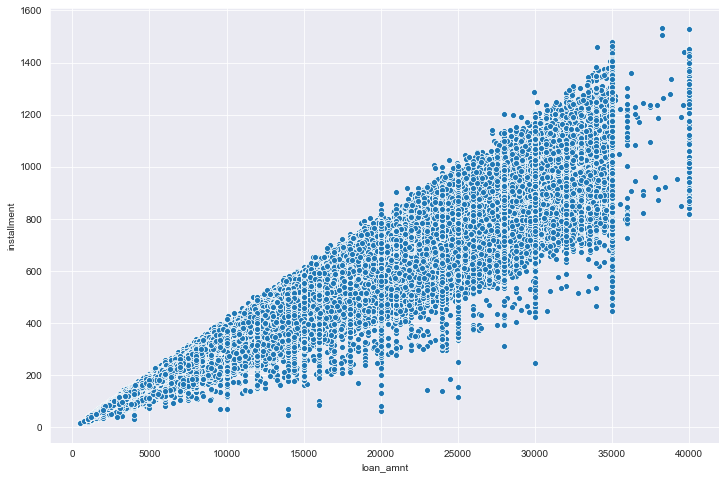

In [69]:
plt.figure(figsize=(12,8))
           
sns.scatterplot(data=df,y='installment', x='loan_amnt')

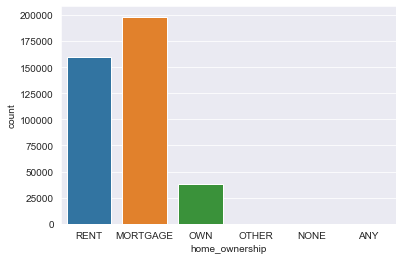

In [70]:
sns.countplot(data=df,x='home_ownership')

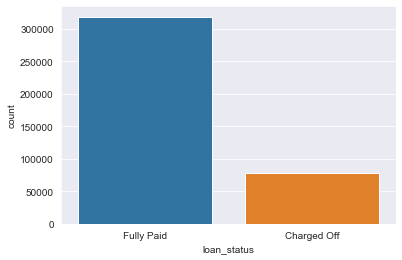

In [71]:
sns.countplot(data=df, x='loan_status')

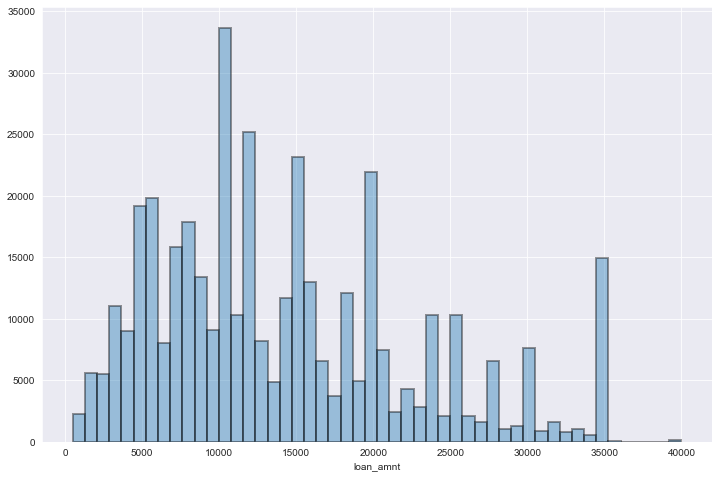

In [72]:
plt.figure(figsize=(12,8))

sns.distplot(df['loan_amnt'],kde=False, hist_kws=dict(edgecolor="k", linewidth=2),)

In [73]:
df.corr().sort_values(by='annual_inc',axis=0, ascending=False)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
mort_acc,0.222315,-0.082583,0.193694,0.236320,-0.025439,0.109205,0.011552,0.194925,0.007514,0.381072,1.000000,0.027239
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
pub_rec_bankruptcies,-0.106539,0.057450,-0.098628,-0.050162,-0.014558,-0.027732,0.699408,-0.124532,-0.086751,0.042035,0.027239,1.000000


^ Per the correlation matrix cell above: 

1) Int rate (the higher, the riskier the loan) - Highest correlation with revol_util (revolving line utilization rate - the amount of credit the borrower is using relative to all available revolving credit 

2) 

In [75]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind='quicksort')

In [ ]:
print(so)

In [77]:
q = df.corr().unstack().sort_values().drop_duplicates()

In [ ]:
#pd.set_option('display.max_rows', None)
#to display max rows 
print(q)

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='Greens')

#corr = df.corr()
#high_corr = corr[corr>.65]
#sns.heatmap(high_corr, cmap='Greens')

In [ ]:
sns.boxplot(data=df, x='loan_status', y='loan_amnt')

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

In [6]:
sns.set_style('darkgrid')

In [ ]:
sns.set_style('darkgrid')
sns.countplot(data=df, x='grade', hue='loan_status')

#Most loans total -- B, A, C, E, D, F, G (very few)

In [7]:
sorted_sub_g = sorted(df['sub_grade'].unique())

print(sorted_sub_g)

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


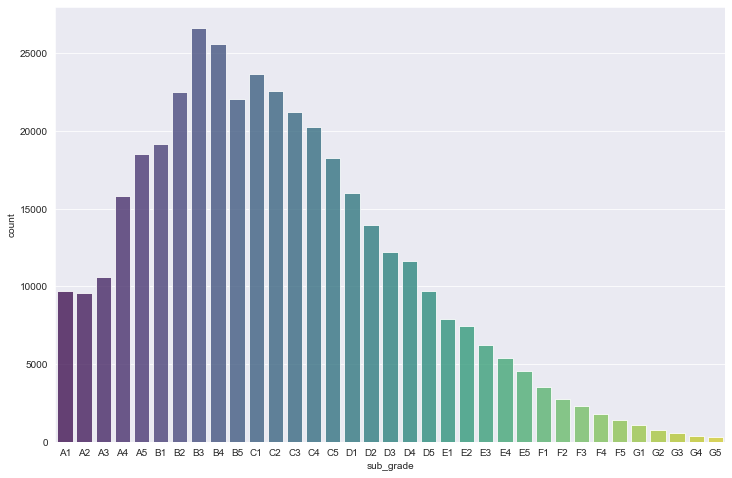

In [18]:
plt.figure(figsize=(12,8))
sorted_sub_g = sorted(df['sub_grade'].unique())
sns.countplot(data=df, x='sub_grade', palette='viridis', order=sorted_sub_g, alpha=0.8)

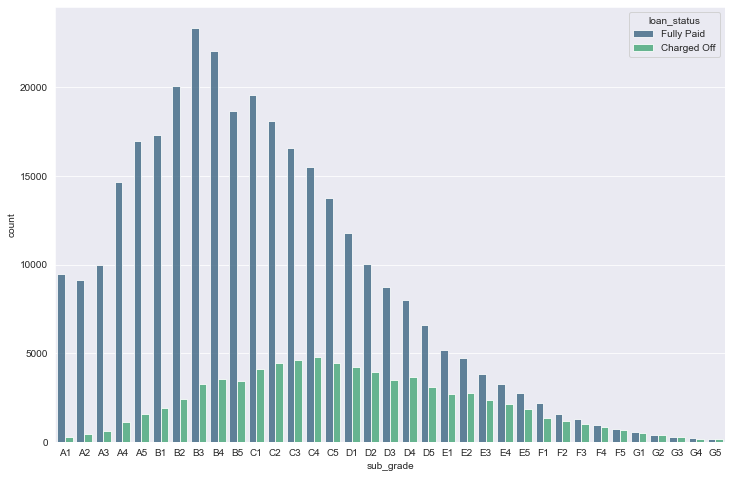

In [9]:
plt.figure(figsize=(12,8))
sorted_sub_g = sorted(df['sub_grade'].unique())
sns.countplot(data=df, x='sub_grade', palette='viridis', order=sorted_sub_g, alpha=0.8, hue=df['loan_status'])

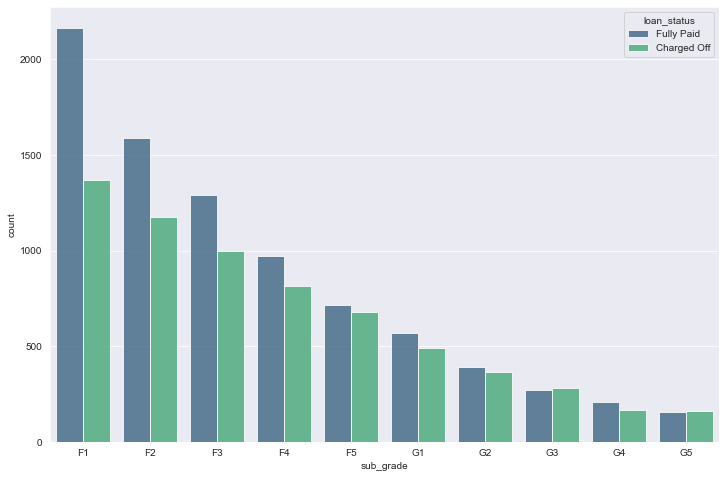

In [10]:
sorted_for_fg = [ i for i in sorted_sub_g if i[0] in ['F','G'] ]

plt.figure(figsize=(12,8))
sorted_sub_g = sorted(df['sub_grade'].unique())
sns.countplot(data=df, x='sub_grade', palette='viridis', order=sorted_for_fg, alpha=0.8, hue=df['loan_status'])



In [19]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [20]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

# DATA PRE-PROCESSING & FEATURE ENGINEERING

In [21]:
null_count = df.isnull().sum().sort_values(ascending=False)
perc = (null_count/len(df))*100
print(perc)

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
loan_repaid             0.000000
issue_d                 0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
purpose                 0.000000
loan_status             0.000000
address                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
loan_amnt               0.000000
dtype: float64


In [22]:
df['emp_title'].nunique()

173105

In [11]:
df['emp_title'].value_counts()

Teacher                         4389
Manager                         4250
Registered Nurse                1856
RN                              1846
Supervisor                      1830
                                ... 
National Solutions Consulant       1
Microdesk                          1
title officer                      1
Starcon                            1
Defiance Metal Products            1
Name: emp_title, Length: 173105, dtype: int64

In [60]:
df = df.drop('emp_title',axis=1)

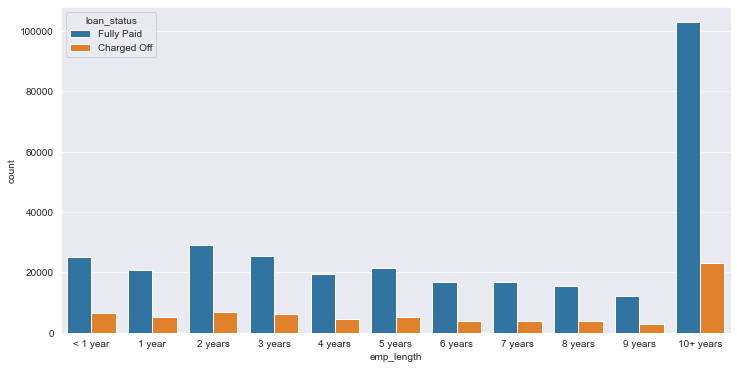

In [24]:
plt.figure(figsize=(12,6))

emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

sns.countplot(data=df, x=df['emp_length'].sort_values(), order=emp_length_order, hue='loan_status')

In [25]:
FP_length = df.loc[df['loan_status']=='Fully Paid', 'emp_length'].groupby(df['emp_length']).count()

FP_length

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: emp_length, dtype: int64

In [26]:
Total_FP = df.loc[df['loan_status'] == 'Fully Paid', 'emp_length'].count()

In [27]:
CO_length = df.loc[df['loan_status'] == 'Charged Off', 'emp_length'].groupby(df['emp_length']).count()

In [28]:
FP_ratio_by_emp_length = FP_length/(FP_length + CO_length)

FP_ratio_by_emp_length

emp_length
1 year       0.800865
10+ years    0.815814
2 years      0.806738
3 years      0.804769
4 years      0.807615
5 years      0.807813
6 years      0.810806
7 years      0.805226
8 years      0.800240
9 years      0.799530
< 1 year     0.793128
Name: emp_length, dtype: float64

(0.6, 0.85)

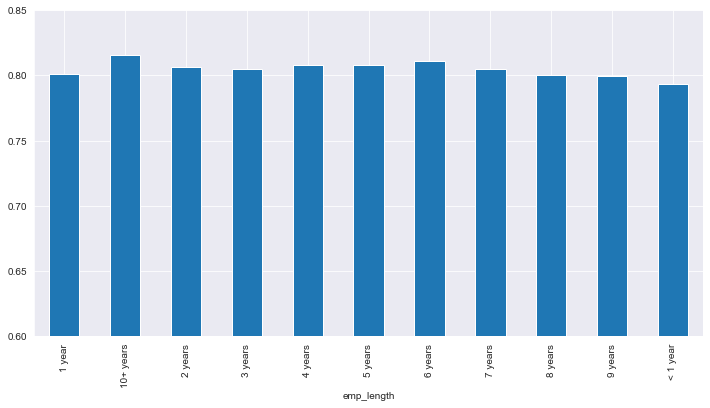

In [29]:
plt.figure(figsize=(12,6))

FP_ratio_by_emp_length.plot(kind='bar')
plt.ylim(0.6,0.85)

In [ ]:
##FIGURE OUT THIS SEABORN CHART

plt.figure(figsize=(12,6))

sns.barplot(data=df, x=df['emp_length'], y= FP_ratio_by_emp_length, order=emp_length_order)

In [30]:
df = df.drop('emp_length', axis=1)

In [31]:
df = df.drop('title', axis=1)

In [ ]:
feat_info('mort_acc')
df.isnull().sum().sort_values(ascending=False)

In [ ]:
df['mort_acc'].value_counts()

In [ ]:
df.corr()['mort_acc'].sort_values()

In [32]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg[4]

0.0667433831990794

In [33]:
def fill_empty_mort_acc (the_total_acc, the_mort_acc):
    if np.isnan(the_mort_acc):
        return total_acc_avg[the_total_acc]
    else:
        return the_mort_acc

In [34]:
df['mort_acc'] = df.apply(lambda x: fill_empty_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [106]:
df = df.dropna()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [35]:
#using .dropna() to remove missing values down the pub_rec_bankruptcies column and the revol_util column 

df.dropna(how='any', subset=['pub_rec_bankruptcies'], inplace=True)

In [ ]:
df['pub_rec_bankruptcies'].isna().value_counts()

In [36]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [ ]:
df['term'].value_counts()

In [107]:
df['term'] = df['term'].map(lambda x: int(x[:3]))

TypeError: 'int' object is not subscriptable

In [38]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Dealing with Categorial variables 

In [108]:
df = df.drop('grade', axis=1)

KeyError: "['grade'] not found in axis"

In [43]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

subgrade_dummies.head()

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
df = pd.concat([df.drop('sub_grade', axis=1), subgrade_dummies], axis=1)

KeyError: "['sub_grade'] not found in axis"

In [58]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'MORTGAGE', 'NONE', 'OTHER',
       'OWN', 'RENT', '051

In [110]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)

df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1)

df = pd.concat([df, dummies], axis=1)

KeyError: "None of [Index(['verification_status', 'application_type', 'initial_list_status',\n       'purpose'],\n      dtype='object')] are in the [columns]"

In [ ]:
df['home_ownership'].value_counts()

In [46]:
df['home_ownership'] = df['home_ownership'].replace(['NONE, ANY'], 'OTHER')

ownership_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = df.drop('home_ownership', axis=1)
df = pd.concat([df,ownership_dummies], axis=1)

In [47]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [48]:
zip_dummies = pd.get_dummies(df['zip_code'], drop_first=True)
df = df.drop(['zip_code', 'address'], axis=1)
df = pd.concat([df, zip_dummies], axis=1)

In [175]:
feat_info('issue_d')

The month which the loan was funded


In [49]:
df = df.drop('issue_d', axis=1)

In [ ]:
feat_info('earliest_cr_line')

In [146]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))
df = df.drop('earliest_cr_line', axis=1) 

KeyError: 'earliest_cr_line'

# Train Test Split - Model Training

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
df = df.drop('loan_status', axis=1)

KeyError: "['loan_status'] not found in axis"

In [113]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler = MinMaxScaler()

In [117]:
X_train = scaler.fit_transform(X_train)

In [118]:
X_test = scaler.transform(X_test)

In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [120]:
X_train.shape

(316175, 80)

In [134]:
lending_model = Sequential()

#input layer
lending_model.add(Dense(80, activation='relu'))
lending_model.add(Dropout(0.25))

#hidden layer 1
lending_model.add(Dense(40, activation='relu'))
lending_model.add(Dropout(0.25))

#hidden layer 2
lending_model.add(Dense(20, activation='relu'))
lending_model.add(Dropout(0.2))

#using relu because ? 


#output layer - using sigmoid activation because the problem being solved is BINARY CLASSIFICATION (will the lender default or not)
lending_model.add(Dense(units=1, activation='sigmoid')) 

#compile model
lending_model.compile(optimizer='adam', loss='binary_crossentropy')

In [136]:
lending_model.fit(x=X_train, y=y_train, 
                  validation_data=(X_test, y_test), 
                 batch_size=128, epochs=25)

Epoch 1/25
2471/2471 [==============================] - 7s 3ms/step - loss: 0.2909 - val_loss: 0.2634
Epoch 2/25
2471/2471 [==============================] - 6s 2ms/step - loss: 0.2648 - val_loss: 0.2630
Epoch 3/25
2471/2471 [==============================] - 6s 3ms/step - loss: 0.2627 - val_loss: 0.2628
Epoch 4/25
2471/2471 [==============================] - 7s 3ms/step - loss: 0.2616 - val_loss: 0.2620
Epoch 5/25
2471/2471 [==============================] - 6s 2ms/step - loss: 0.2608 - val_loss: 0.2630
Epoch 6/25
2471/2471 [==============================] - 6s 3ms/step - loss: 0.2606 - val_loss: 0.2623
Epoch 7/25
2471/2471 [==============================] - 6s 2ms/step - loss: 0.2601 - val_loss: 0.2618
Epoch 8/25
2471/2471 [==============================] - 6s 2ms/step - loss: 0.2600 - val_loss: 0.2619
Epoch 9/25
2471/2471 [==============================] - 6s 3ms/step - loss: 0.2595 - val_loss: 0.2614
Epoch 10/25
2471/2471 [==============================] - 6s 3ms/step - loss: 0.259

In [137]:
from tensorflow.keras.models import load_model

In [138]:
lending_model.save('full_lending_club_model.h5')

In [139]:
losses = pd.DataFrame(lending_model.history.history)

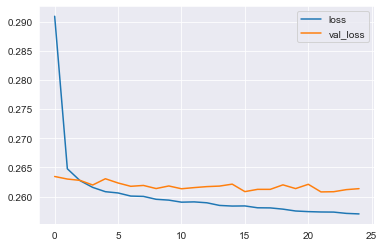

In [141]:
losses.plot()


In [142]:
from sklearn.metrics import classification_report, confusion_matrix

In [149]:
predictions = lending_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [151]:
(lending_model.predict(X_test) > 0.5).astype("int32")

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [145]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,MORTGAGE,NONE,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1999


In [152]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [153]:
print(confusion_matrix(y_test,predictions))

[[ 6918  8740]
 [  178 63208]]


In [154]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt                              25000.00
term                                      60.00
int_rate                                  18.24
installment                              638.11
annual_inc                             61665.00
dti                                       30.11
open_acc                                  16.00
pub_rec                                    0.00
revol_bal                              27778.00
revol_util                                65.50
total_acc                                 46.00
mort_acc                                   0.00
pub_rec_bankruptcies                       0.00
A2                                         0.00
A3                                         0.00
A4                                         0.00
A5                                         0.00
B1                                         0.00
B2                                         0.00
B3                                         0.00
B4                                      

In [158]:
new_customer = scaler.transform(new_customer.values.reshape(1,80))

In [159]:
lending_model.predict_classes(new_customer)

array([[1]])

In [157]:
df.iloc[random_ind]['loan_repaid']

1.0